## Data Analysis

In [3]:
import pandas as pd
import numpy as np                      
import matplotlib.pyplot as plt         
import seaborn as sns
from collections import Counter         
import re                               
import warnings                         
warnings.filterwarnings("ignore")
plt.style.use('dark_background')

### EDA

In [4]:
df = pd.read_csv('../data/stepik_parsed.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     927 non-null    object
 1   about     927 non-null    object
 2   skills    927 non-null    object
 3   students  927 non-null    int64 
 4   price     927 non-null    object
dtypes: int64(1), object(4)
memory usage: 36.3+ KB


Итак, у нас есть информация о 927 курсах.

In [6]:
df.head()

,title,about,skills,students,price
0,Основы PHP: Структура и Синтаксис,Курс сосредоточен на PHP7.4\nЭтот курс позволи...,Чему вы научитесь\n\nРешать задачи в PHP.\nПон...,5,700 ₽
1,Основы SQL для программистов без поддержки,На этом курсе вы узнаете: как работают Реляцио...,Чему вы научитесь\n\n1. После изучения данного...,13,1 000 ₽
2,Zbrush - пошаговый курс / 3D моделирование / С...,"Не нужно беспокоиться, если раньше вы не поним...",Чему вы научитесь\n\nБудете легко ориентироват...,13,2 900 ₽
3,Как нанять CRM-маркетолога,Зарегистрируйтесь на курс «Как нанять CRM-марк...,"О курсе\n \n Курс для тех, кто нанима...",402,Бесплатно
4,Тестировщик мобильных приложений: Android и iOS,"Курс для тех, кто хочет стать тестировщиком мо...",Чему вы научитесь\n\nРазберетесь в особенностя...,80,1 999 ₽


В колонке с ценой есть не только числа, но и значение "Бесплатно", а сама цена указана со значком рубля или доллара (где с долларом — умножим на 90, пусть все будет в рублях). Уберем артефакты и приведем данные к типу _int_.

In [7]:
def process_price(price_str):
    price_str = str(price_str).strip()
    
    if 'Бесплатно' in price_str:
        return 0
    
    is_dollar = '$' in price_str
    
    clean_price = re.sub(r'[^\d.,]', '', price_str)
    
    clean_price = clean_price.replace(',', '.')
    
    try:
        price = float(clean_price)
        return int(price * 90) if is_dollar else int(price)
    except ValueError:
        return 0

df['price'] = df['price'].apply(process_price)

In [10]:
df.to_csv('../data/stepik_parsed.csv', index=False)

In [9]:
np.sort(df.price.unique())


array([    0,    99,   100,   149,   150,   179,   190,   199,   200,
         225,   250,   256,   270,   280,   289,   290,   299,   300,
         349,   350,   357,   365,   370,   389,   390,   400,   449,
         450,   480,   490,   499,   500,   590,   599,   600,   620,
         629,   630,   650,   678,   690,   699,   700,   720,   745,
         750,   789,   790,   799,   800,   820,   840,   849,   850,
         890,   897,   899,   900,   910,   950,   970,   990,   999,
        1000,  1080,  1090,  1099,  1100,  1150,  1190,  1199,  1200,
        1279,  1290,  1299,  1300,  1334,  1350,  1390,  1399,  1400,
        1480,  1490,  1499,  1500,  1590,  1599,  1650,  1699,  1700,
        1750,  1790,  1799,  1800,  1870,  1880,  1890,  1899,  1900,
        1950,  1990,  1999,  2000,  2190,  2199,  2200,  2299,  2300,
        2399,  2400,  2450,  2490,  2499,  2500,  2590,  2600,  2610,
        2650,  2670,  2700,  2850,  2890,  2900,  2920,  2990,  2999,
        3000,  3072,

Посмотрим на топ-10 самых дорогих курсов.

In [ ]:
top_10 = df.sort_values('price', ascending=False)[:10]

print("Топ-10 самых дорогих курсов:")
top_10[['title', 'price']]


Топ-10 самых дорогих курсов:


,title,price
140,Математика для Data Science. Специализация. Та...,80000
707,Алгоритмический фундамент программиста,60000
139,Математика для Data Science. Специализация. Та...,55000
882,Программирование на Python,50000
614,WEB программирование на ASP.NET Core,49990
596,Математика для аналитиков. Специализация (Фейн...,45000
714,Написание оконных приложений на C#,35990
468,WEB программирование на ASP.NET Core. ВСЕ САМ,34990
565,Проектирование архитектуры и интеграций сервис...,32999
479,Продвинутая работа с ошибками и паникой в Go (...,30400


В топе — "Математика для Data Science", "Алгоритмический фундамент программиста" и "Программирование на Python".

Посмотрим, каких цен больше всего.

In [ ]:
df.price.value_counts().to_frame()

,price
0,291
1990,27
990,25
500,19
3000,17
...,...
34990,1
270,1
2850,1
357,1


In [ ]:
df.price.describe()

count      927.000000
mean      2498.209277
std       6187.780362
min          0.000000
25%          0.000000
50%        890.000000
75%       2490.000000
max      80000.000000
Name: price, dtype: float64

Больше всего у нас бесплатных курсов — 291. Среднее значение значительно больше медианы за счет сравнительно небольшого количества дорогих курсов. Посмотрим на цены на гистограмме. Зададим ограничение по оси y, чтобы лучше рассмотреть данные.

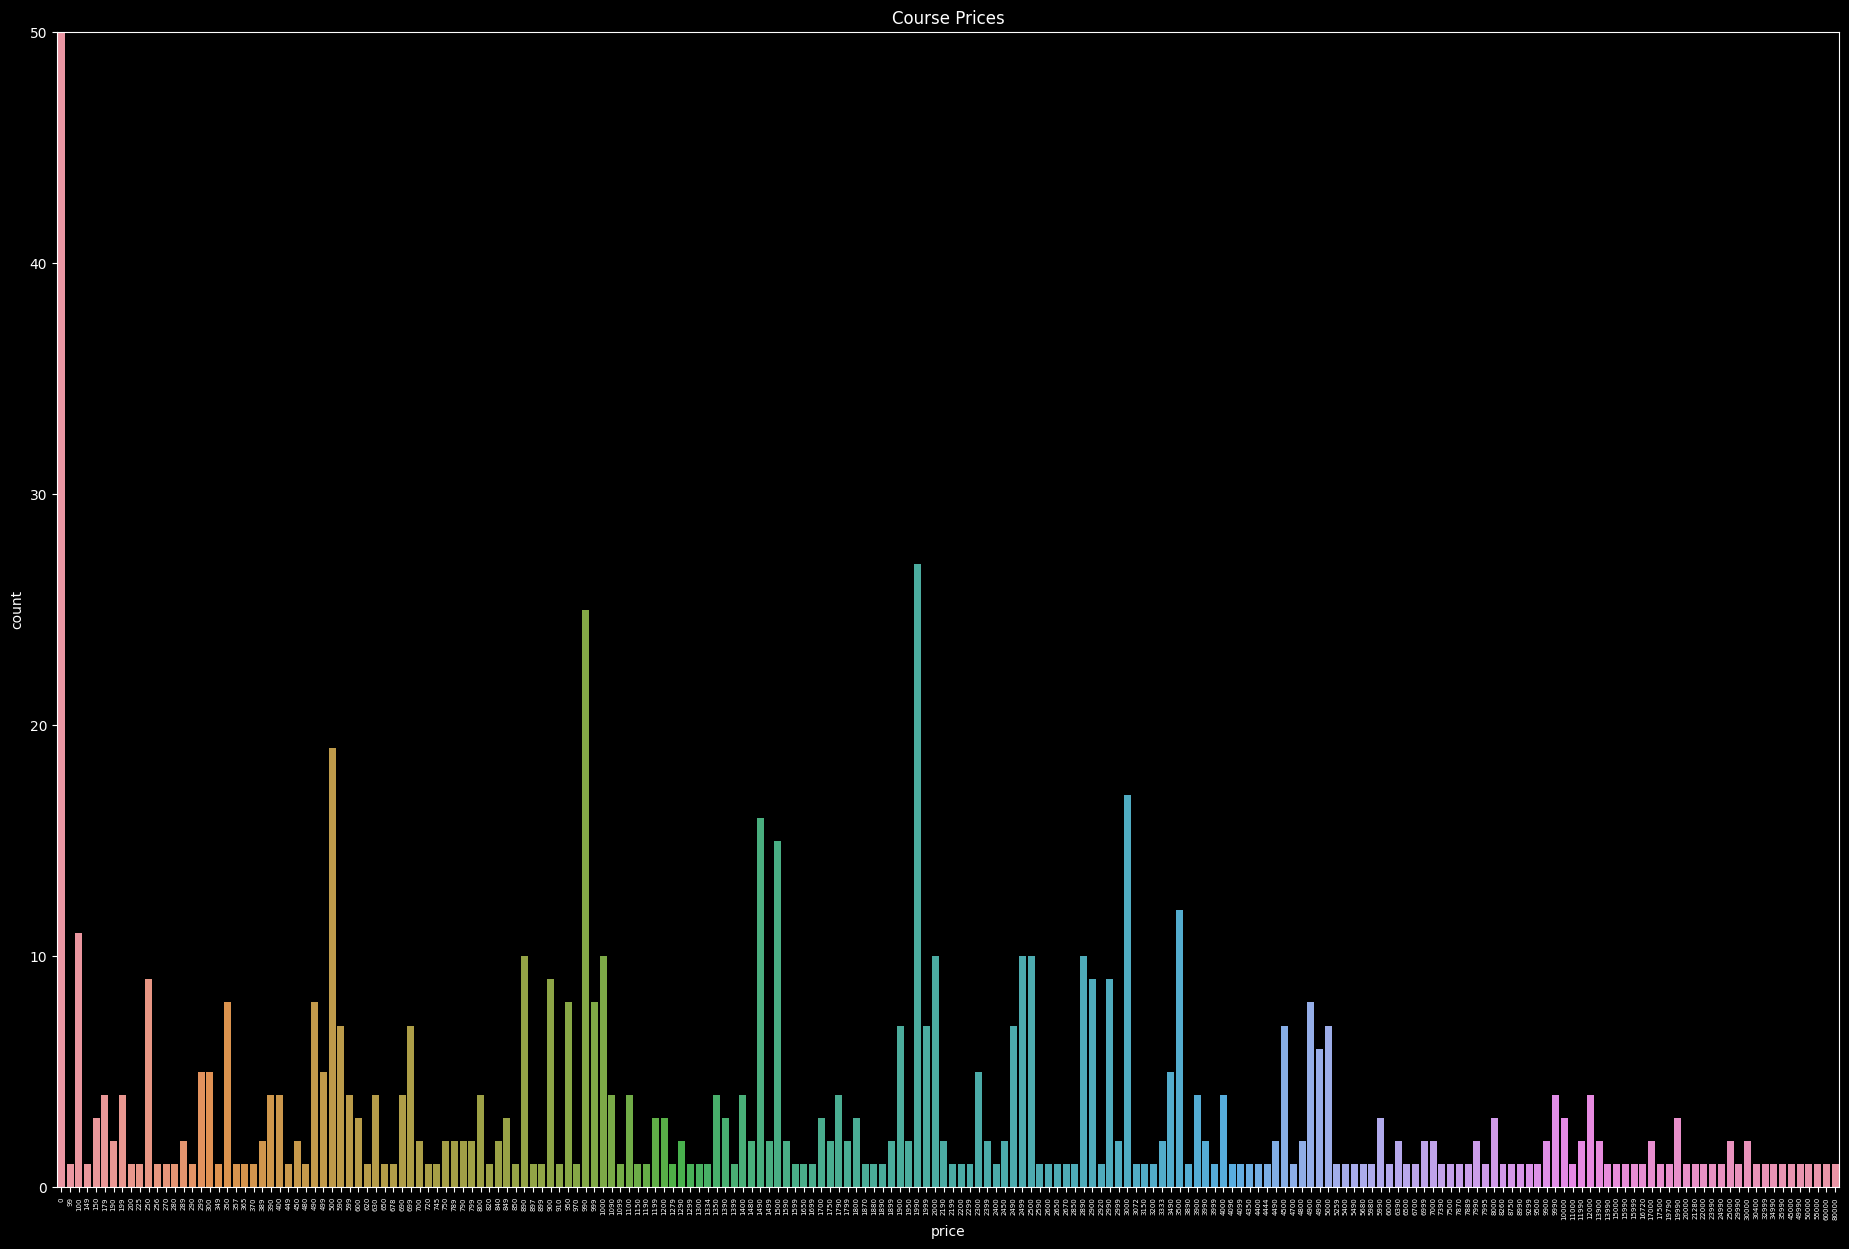

In [ ]:
# hist
plt.figure(figsize=(23,15))
sns.countplot(data = df, x = df.price)
plt.title("Course Prices")
plt.xticks(rotation = 90, fontsize = 5)
plt.ylim(0, 50)

Как видим, дорогих курсов меньшинство, а бесплатных, как уже говорилось, — большинство. Пиковые значения (кроме 0) — в ценах 990 и 1990. Для дальнейшего исследования можно сгруппировать курсы по категориям цен (_small_, _medium_, _large_). Сейчас мы этого делать не будем. Посмотрим на популярность курсов. Для этого обратимся к колонке `students` (число студентов).

In [ ]:
# top 10 most popular courses
top_10 = df.sort_values('students', ascending=False)[:10]

print("Топ-10 самых популярных курсов:")
top_10[['title', 'students', 'price']]


Топ-10 самых популярных курсов:


,title,students,price
886,Android: Профессиональный уровень + Подготовк...,986,8260
835,Основы 3D-моделирования,983,500
412,ОГЭ по биологии: кратко и обо всем,980,650
330,Начальный курс SQL: от Новичка до Специалиста,960,490
538,Верстка и веб-разработка сайтов. Продвинутый у...,957,1990
424,"Первая помощь. Теоретический курс ""Оценка безо...",955,0
637,Как легко контролировать личные финансы и копи...,937,3000
195,Android разработка: Базовый курс + Основы прог...,929,7990
422,Первая помощь. Знаю. Умею. Спасу.,922,0
776,Английский. Начальный уровень,913,400


Интересно, что не все курсы из топ-10 бесплатные. На цифры посмотрели, теперь посмотрим на текстовую часть. Это столбцы  `title`, `about`, `skills`.


Мы составим небольшой предварительный список ключевых слов, которые будем использовать для группировки курсов по темам. Понятно, что при необходимости этот список может дополняться и корректироваться.

In [ ]:
keywords = {
    'Python' : ['python'],
    'JavaScript' : ['javascript', 'JS'],
    'Data Science' : ['data science', 'DS', 'machine learning', 'ml', 'mlops',
                      'машинное обучение', 'машинного обучения', 'машинному обучению',
                      'машинном обучении', 'машинным обучением'],
    'PHP' : ['php', 'php7'],
    'Linux' : ['linux', 'линукс', 'ubuntu', 'bash', 'консоль', 'консолью'],
    'Rust' : ['rust'],
    'Java' : ['java'],
    'C#' : ['c#'],
    'C++' : ['c++'],
    'Android' : ['android'],
    'iOS' : ['ios', 'apple'],
    'SQL' : ['sql', 'postgresql', 'postgres', 'sqlite', 'mysql'],
    'Golang' : ['golang', 'go lang'],
    'DL' : ['deep learning', 'DL', 'neural', 'нейросети', 'нейросетям',
                       'нейросетями', 'нейросетях', 'нейросетей', 'нейронные',
                       'нейронных', 'нейронными', 'нейронным', 'глубокое обучение',
                       'глубокого обучения', 'глубокому обучению', 'глубоком обучении',
                       'глубоким обучением', 'big data'],
    'Web Design' : ['tilda', 'wordpress', 'word press', 'веб-дизайн', 'веб-дизайна', 'веб-дизайну',
                    'веб-дизайном', 'веб-дизайне', 'web-дизайн', 'web-дизайна',
                    'web-дизайну', 'web-дизайном', 'web-дизайне', 'веб-дизайнер',
                    'веб-дизайнера', 'веб-дизайнеру', 'веб-дизайнером', 'веб-дизайнере',
                    'web-дизайнер', 'web-дизайнера', 'web-дизайнеру', 'web-дизайнером',
                    'web-дизайнере', 'web-design', 'веб дизайн', 'веб дизайна', 'веб дизайну',
                    'веб дизайном', 'веб дизайне', 'web дизайн', 'web дизайна',
                    'web дизайну', 'web дизайном', 'web дизайне', 'вебдизайн',
                    'вебдизайна', 'вебдизайну', 'вебдизайном', 'вебдизайне', 'веб дизайнер',
                    'веб дизайнера', 'веб дизайнеру', 'веб дизайнером', 'веб дизайнере',
                    'вебдизайнер', 'вебдизайнера', 'вебдизайнеру', 'вебдизайнером',
                    'вебдизайнере', 'web дизайнер', 'web дизайнера', 'web дизайнеру',
                    'web дизайнером', 'web дизайнере', 'web design', 'дизайн сайтов',
                    'дизайна сайтов', 'дизайну сайтов', 'дизайном сайтов',
                    'дизайне сайтов', 'дизайнер сайтов', 'дизайнера сайтов',
                    'дизайнером сайтов', 'дизайнере сайтов', 'дизайнеру сайтов'],
    'HTML' : ['html', 'css'],
    'Maths, Stats and Algorithms' : ['maths', 'mathematics', 'statistics', 'математика',
                                     'математики', 'математику', 'математики', 'математикой',
                                     'алгебра', 'алгебры', 'алгебру', 'алгебре', 'алгеброй',
                                     'статистика', 'статистики', 'статистику', 'статистике',
                                     'статистикой', 'вероятности', 'теорвер', 'теорвера',
                                     'теорверу', 'теорвером', 'теорвере', 'математическая',
                                     'математическую', 'математической', 'математический',
                                     'математического', 'математическому', 'математическим',
                                     'математическом', 'математическое', 'algorithms',
                                     'алгоритмы', 'алгоритмов', 'алгоритмам', 'алгоритмами', 'алгоритмах'],
    'C' : ['программирование на c', 'программировании на c', 'программированию на c',
           'программированием на c', 'программировать на c', 'основы c', 'основам c'],
    'School' : ['егэ', 'огэ', 'информатика', 'информатики', 'информатику',
                'информатикой', 'информатике', 'для школьников',
                'олимпиадные', 'олимпиадных', 'олимпиадным', 'олимпиадными'],
    '3D' : ['3d', '3 d'],
    'Docker' : ['docker'],
    'Excel' : ['excel'],
    'Data Analysis' : ['data analysis', 'анализ данных', 'анализа данных',
                       'анализу данных', 'анализе данных', 'анализом данных',
                       'аналитика', 'аналитику', 'аналитикой', 'аналитике',
                       'аналитики'],
    'NLP' : ['natural language processing', 'nlp', 'обработка языка',
             'обработку языка', 'обработке языка', 'обработкой языка',
             'обработки языка', 'естественного языка', 'обработка текста',
             'обработку текста', 'обработки языка', 'обработке языка',
             'обработкой языка']
}


In [ ]:
df['topics'] = ""

for index, row in df.iterrows():
    topic_set = set()
    existing_topics = set(row['topics'].split(', '))
    for topic, keywords_list in keywords.items():
        for keyword in keywords_list:
            if re.search(f'\\b{re.escape(keyword)}\\b', row['title'], flags=re.IGNORECASE) or \
              re.search(f'\\b{re.escape(keyword)}\\b', row['about'], flags=re.IGNORECASE) or \
              re.search(f'\\b{re.escape(keyword)}\\b', row['skills'], flags=re.IGNORECASE):
                if topic not in existing_topics:
                    topic_set.add(topic)
    if topic_set:
        existing_topics -= topic_set
        topic_set |= existing_topics
        topic_set = [topic.strip() for topic in topic_set if topic.strip()]
        df.at[index, 'topics'] = ', '.join(topic_set) if len(topic_set) > 0 else 'Other'
    elif existing_topics == {''}:
        df.at[index, 'topics'] = 'Other'

In [ ]:
topic_counts = df.topics.value_counts().to_frame()
topic_counts

,topics
Other,361
"Maths, Stats and Algorithms",59
School,55
Python,42
3D,32
...,...
"Data Analysis, Data Science, Python, Linux",1
"SQL, HTML, Python, JavaScript",1
Data Science,1
"Docker, Data Analysis, Data Science",1


Построим гистограмму по этим данным (уберем категорию _Other_ как самую многочисленную и малоинформативную).

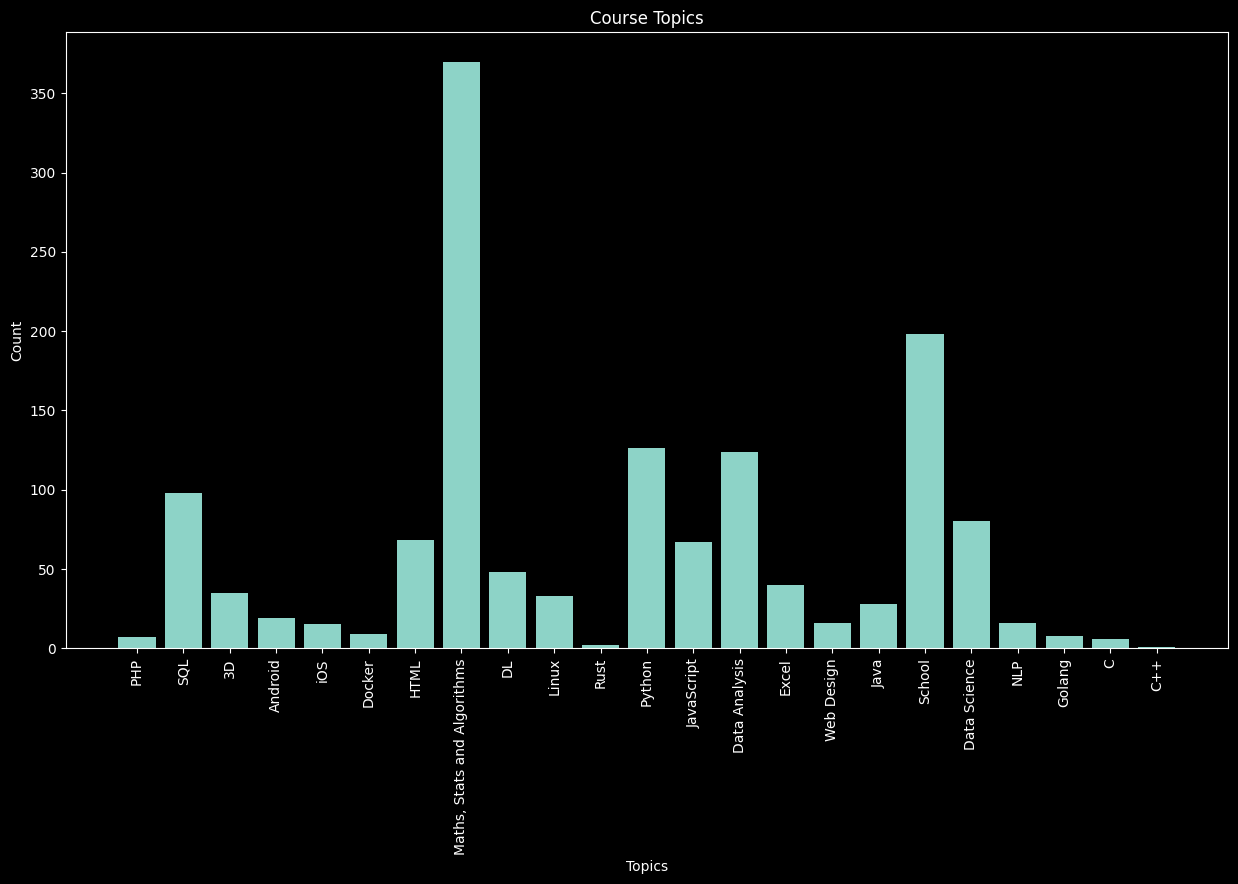

In [ ]:
topic_counts = Counter()

for index, row in df.iterrows():
    topic_list = []
    for topic, keywords_list in keywords.items():
        for keyword in keywords_list:
            if re.search(f'\\b{re.escape(keyword)}\\b', row['title'], flags=re.IGNORECASE) or \
               re.search(f'\\b{re.escape(keyword)}\\b', row['about'], flags=re.IGNORECASE) or \
               re.search(f'\\b{re.escape(keyword)}\\b', row['skills'], flags=re.IGNORECASE):
               topic_list.append(topic)
    if topic_list:
        df.at[index, 'topics'] = ', '.join(topic_list)
        topic_counts.update(topic_list)

topic_counts.pop('Other', None)

plt.figure(figsize=(15, 8))
plt.bar(topic_counts.keys(), topic_counts.values())
plt.xlabel('Topics')
plt.ylabel('Count')
plt.title('Course Topics')
plt.xticks(rotation=90)
plt.show()


По гистограмме можно составить некоторое общее представление о темах курсов, представленных на Stepik. Больше всего курсов (если не считать категорию _Other_) имеют отношение к математике, статистике и алгоритмам. Мы исследовали как сами названия курсов, так и их описания, поэтому наличие ключевых слов, относящихся к математике, статистике и алгоритмам, необязательно означает, что курс непосредственно посвящен именно этим темам. Возможно, в дальнейшем исследовании эту категорию стоит исключить как слишком широкую либо скореектировать ключевые слова. Скорее всего, более релевантный (но, возможно, менее полный) результат поиска по ключевым словам будет обеспечен при поиске по заголовку курса (без описания). Из языков программирования лидирует Python.

Осталось исследовать размер наших текстовых описаний. Будем считать суммарно — тексты в колонках `about` и `skills`.

In [ ]:
def count_words(text):
    words = re.findall(r'\b\w+\b', text)
    return len(words)

df['word_count'] = df['about'].apply(count_words) + df['skills'].apply(count_words)

In [ ]:
df.word_count.describe().to_frame()

,word_count
count,927.000000
mean,136.526429
std,102.818284
min,16.000000
25%,69.000000
50%,104.000000
75%,169.000000
max,721.000000


Средняя длина текста — 136 слов, медиана чуть меньше, что говорит об имеющемся разбросе в длине текстов.

In [ ]:
df.sort_values(by='word_count', ascending=False)[:10]

,title,about,skills,students,price,topics,word_count
823,АудиоТренажер разговорного английского. Базовы...,"АудиоТренажер разговорного английского "" Базов...",О курсе\n \n Hello and welcome\nЗдрав...,3,1650,Other,721
261,Испанский / Русский: Прогрессивный курс общ...,В курсе рассказывается о единой и взаимопонима...,О курсе\n \n Курс посвящён общим слов...,6,0,Other,690
489,BIM Planet No1. Знакомство с Dynamo (полный ку...,Курс посвящен основам работы в Dynamo - плагин...,О курсе\n \n \n \n\n \nЛучший платн...,1,17500,Python,680
488,BIM Planet No2. Погружение в IronPython и Revi...,"Курс посвящен языку IronPython и тому, как с е...",О курсе\n \n \nКурс посвящается всем ...,513,17000,Python,677
300,English Phrasal Verbs 2.0,"Практический курс для тех, кто изучает английс...",О курсе\n \n Фразовые глаголы как «го...,50,2900,Other,592
252,СОТОЧКА ПО РУССКОМУ: помощник в подготовке к Е...,Курс-помощник в подготовке к ЕГЭ по русскому я...,"О курсе\n \n Это копия курса ""Соточка...",3,2400,School,563
852,"КОМПАС-3D v17, основы трёхмерного моделирования",Курс посвящен изучению технологии трёхмерного ...,О курсе\n \n Цель данного курса - поз...,668,300,3D,546
118,SQLite для аналитики,Прикладной анализ данных на SQL. Импорт и эксп...,"О курсе\n \n Аналитики, разработчики ...",362,3000,"SQL, SQL, Maths, Stats and Algorithms, Excel, ...",540
207,"Профессия ""C# разработчик""","С# разработчик – это человек, который пишет ко...",О программе\n \n Хочешь получить бесп...,322,19990,Other,533
490,Маркетинг,Данный курс ориентирован на формирование марке...,О курсе\n \n Автор: Тюфякова Екатерин...,12,0,Other,529


In [ ]:
df.sort_values(by='word_count')[:10]

,title,about,skills,students,price,topics,word_count
431,Электробезопасность,Элетробезопасность для всех. Курс содержит инф...,Наши преподаватели,5,0,Other,16
665,Продвижение Behance,Советы по оформлению и быстрому продвижению ак...,"Чему вы научитесь\n\nУзнаете, как продвинуть с...",11,150,Other,23
177,Олимпиадные задачи по математике (5 класс),Данный ресурс позволит познакомиться с основны...,Наши преподаватели,3,0,"School, School",24
880,Основы Python,Делайте первые шаги программирования с нами. Н...,Чему вы научитесь\n\nНаучитесь создавать прост...,91,599,Python,24
241,Программирование С++ Основы,Записи уроков информатики Лицея №29 Тамбов.,О курсе\n \n Школьная программа инфор...,4,0,School,24
767,Инди курс по Pygame - учимся создавать свои игры,В этом курсе мы познакомимся с библиотекой pyg...,Чему вы научитесь\n\nСоздавать игры на python,120,750,Python,26
776,Английский. Начальный уровень,"Это курс для тех, кому хочется изучить английс...","Чему вы научитесь\n\nЧитать, понимать простые ...",913,400,Other,26
694,Пакет курсов Рисования,Пакет из трёх практических курсов по рисованию...,Что внутри\n\n В комплект входят ...,5,990,Other,27
594,Шаблонизатор Pug,"Прокачайте свои навыки по HTML, освоив совреме...",Чему вы научитесь\n\nИспользовать и создавать ...,25,990,HTML,29
179,"Математика 5 класс. Учебник Мерзляк, Полонский",Дроби - первое серьезное испытание для 5-класс...,О курсе\n \n Научиться понимать дроби...,1,0,"Maths, Stats and Algorithms",30
